# Notes for running this notebook
This notebook should be run in a location where "precip" and "wind" directories are located


# Relevant weather data sets for this notebook

1) (Data sets for 1968 - 1971)
[HRM3-gfdl historical climate data](https://www.earthsystemgrid.org/dataset/narccap.hrm3.gfdl-current.table2.html),
[HRM3-hadcm3 historical climate data](https://www.earthsystemgrid.org/dataset/narccap.hrm3.hadcm3-current.table2.html),
[CRCM-ccsm historical climate data](https://www.earthsystemgrid.org/dataset/narccap.crcm.ccsm-current.table2/file.html),
[CRCM-cgcm3 historical climate data](https://www.earthsystemgrid.org/dataset/narccap.crcm.cgcm3-current.table2.html),
[RCM3-cgcm3 historical climate data](https://www.earthsystemgrid.org/dataset/narccap.rcm3.cgcm3-current.table2.html),
[RCM3-gfdl historical climate data](https://www.earthsystemgrid.org/dataset/narccap.rcm3.gfdl-current.table2.html)







2) (Data sets for 2061 - 2066)
[HRM3-gfdl future climate data](https://www.earthsystemgrid.org/dataset/narccap.hrm3.gfdl-future.table2.html),
[HRM3-hadcm3 future climate data](https://www.earthsystemgrid.org/dataset/narccap.hrm3.hadcm3-future.table2.html),
[CRCM-ccsm future climate data](https://www.earthsystemgrid.org/dataset/narccap.crcm.ccsm-future.table2.html),
[CRCM-cgcm3 future climate data](https://www.earthsystemgrid.org/dataset/narccap.crcm.cgcm3-future.table2.html),
[RCM3-cgcm3 future climate data](https://www.earthsystemgrid.org/dataset/narccap.rcm3.cgcm3-future.table2.html),
[RCM3-gfdl future climate data](https://www.earthsystemgrid.org/dataset/narccap.rcm3.gfdl-future.table2.html)




# Part 1: Importing Necessary Modules, Identifying location of interest, and Acquiring/Saving Relevant Weather Files

## UAS

In [ ]:
# =============================================================================
# Relevant Imports
# =============================================================================
import pandas as pd
import numpy as np
import chrpa.main.processing as main
import os
import glob
import gc
import psutil
import time


climate_models = ['HRM3_gfdl', 'CRCM_ccsm', 'CRCM_cgcm3',
                  'HRM3_hadcm3', 'RCM3_cgcm3', 'RCM3_gfdl']
sites = pd.read_pickle('sites.pkl')

t0 = time.time()

for i in range(len(sites)):
    
    t1 = time.time()

    # Initialization of different pandas.Series for saving data
    time_current = pd.Series(dtype='float64')
    uas_current = pd.Series(dtype='float64')
    time_future = pd.Series(dtype='float64')
    uas_future = pd.Series(dtype='float64')

    site_loc = (sites.iloc[i].lat, sites.iloc[i].lon)
    site_name = 'RandomSite'+str(i)
    print(site_name, site_loc)
    pkl_dir = os.path.join('outputs_multi','pkl_data')

    for mymodel in climate_models:
        print(mymodel)
        ncwvar='uas'
        myfile = ncwvar+'_'+mymodel+'_1968010103.nc'
        wind_dir = os.path.join('.', 'wind') #directory for wind_files
        ncfilepath = os.path.join(wind_dir, myfile)

        if 'HRM3' in mymodel:
            offset=[0,0]
        else:
            offset = [0,-360]

    #Finding closest grid cell to location of interest for specified weather model
        close_info = main.get_closest_point(site_loc, ncfilepath, offset)

    # =============================================================================
    # Acquiring Weather Files
    # =============================================================================

    #options
        limited_files = False

    # Wind
        site_ncindices = (close_info['nc_xindex'], close_info['nc_yindex'])


        model_ncfiles = sorted(glob.glob(os.path.join('.', 'wind', ncwvar+'_'+mymodel+'*.nc')))
        
        if limited_files==True:
            model_ncfiles = model_ncfiles[0:2]+model_ncfiles[-2:] # HACK => just to limit to a few wind files
        
        current_ncfiles = [i for i in model_ncfiles if int(i[-13:-9])<2023]
        future_ncfiles = [i for i in model_ncfiles if int(i[-13:-9])>2023]
        
        timelistuas_current, uaslist_current = main.make_ordered_time_weather_lists(current_ncfiles, site_ncindices, ncwvar)
        timelistuas_future, uaslist_future = main.make_ordered_time_weather_lists(future_ncfiles, site_ncindices, ncwvar)

        time_current[mymodel] = timelistuas_current
        uas_current[mymodel] = uaslist_current
        time_future[mymodel] = timelistuas_future
        uas_future[mymodel] = uaslist_future
        print(psutil.virtual_memory()._asdict())
        gc.collect()
        collected = gc.collect()


    # =============================================================================
    # Saving Relevant Weather Files in pkl format
    # =============================================================================
    time_current.to_pickle(os.path.join(pkl_dir, site_name+'_timelistUAScurrent_mods.pkl'))
    uas_current.to_pickle(os.path.join(pkl_dir, site_name+'_UASlistcurrent_mods.pkl'))
    time_future.to_pickle(os.path.join(pkl_dir, site_name+'_timelistUASfuture_mods.pkl'))
    uas_future.to_pickle(os.path.join(pkl_dir, site_name+'_UASlistfuture_mods.pkl'))
    
    t2 = time.time()
    inner_total = t2-t1
    print('inner_total= ',inner_total)
    
total = t2-t0
print('total= ',total)

RandomSite0 (41.6853205, -94.0407065)


# Resetting Memory

In [ ]:
%reset -f

## VAS

In [ ]:
# =============================================================================
# Relevant Imports
# =============================================================================
import pandas as pd
import numpy as np
import chrpa.main.processing as main
import os
import glob
import gc
import psutil
import time


climate_models = ['HRM3_gfdl', 'CRCM_ccsm', 'CRCM_cgcm3',
                  'HRM3_hadcm3', 'RCM3_cgcm3', 'RCM3_gfdl']
sites = pd.read_pickle('sites.pkl')

t0 = time.time()

for i in range(len(sites)):
    
    t1 = time.time()

    # Initialization of different pandas.Series for saving data
    time_current = pd.Series(dtype='float64')
    vas_current = pd.Series(dtype='float64')
    time_future = pd.Series(dtype='float64')
    vas_future = pd.Series(dtype='float64')

    site_loc = (sites.iloc[i].lat, sites.iloc[i].lon)
    site_name = 'RandomSite'+str(i)
    print(site_name, site_loc)
    pkl_dir = os.path.join('outputs_multi','pkl_data')

    for mymodel in climate_models:
        print(mymodel)
        ncwvar='vas'
        myfile = ncwvar+'_'+mymodel+'_1968010103.nc'
        wind_dir = os.path.join('.', 'wind') #directory for wind_files
        ncfilepath = os.path.join(wind_dir, myfile)

        if 'HRM3' in mymodel:
            offset=[0,0]
        else:
            offset = [0,-360]

    #Finding closest grid cell to location of interest for specified weather model
        close_info = main.get_closest_point(site_loc, ncfilepath, offset)

    # =============================================================================
    # Acquiring Weather Files
    # =============================================================================

    #options
        limited_files = False

    # Wind
        site_ncindices = (close_info['nc_xindex'], close_info['nc_yindex'])


        model_ncfiles = sorted(glob.glob(os.path.join('.', 'wind', ncwvar+'_'+mymodel+'*.nc')))
        
        if limited_files==True:
            model_ncfiles = model_ncfiles[0:2]+model_ncfiles[-2:] # HACK => just to limit to a few wind files
        
        current_ncfiles = [i for i in model_ncfiles if int(i[-13:-9])<2023]
        future_ncfiles = [i for i in model_ncfiles if int(i[-13:-9])>2023]
        
        timelistvas_current, vaslist_current = main.make_ordered_time_weather_lists(current_ncfiles, site_ncindices, ncwvar)
        timelistvas_future, vaslist_future = main.make_ordered_time_weather_lists(future_ncfiles, site_ncindices, ncwvar)

        time_current[mymodel] = timelistvas_current
        vas_current[mymodel] = vaslist_current
        time_future[mymodel] = timelistvas_future
        vas_future[mymodel] = vaslist_future
        print(psutil.virtual_memory()._asdict())
        gc.collect()
        collected = gc.collect()


    # =============================================================================
    # Saving Relevant Weather Files in pkl format
    # =============================================================================
    time_current.to_pickle(os.path.join(pkl_dir, site_name+'_timelistVAScurrent_mods.pkl'))
    vas_current.to_pickle(os.path.join(pkl_dir, site_name+'_VASlistcurrent_mods.pkl'))
    time_future.to_pickle(os.path.join(pkl_dir, site_name+'_timelistVASfuture_mods.pkl'))
    vas_future.to_pickle(os.path.join(pkl_dir, site_name+'_VASlistfuture_mods.pkl'))
    
    t2 = time.time()
    inner_total = t2-t1
    print('inner_total= ',inner_total)
    
total = t2-t0
print('total= ',total)

# Resetting Memory

In [5]:
%reset -f

# Part 2:  Processing data

RandomSite0 lat/lon: (41.6853205, -94.0407065)
          model time_period    site_name       min      mean        max  \
0     CRCM_ccsm     current  RandomSite0  0.441885  6.867060  21.552948   
1    CRCM_cgcm3     current  RandomSite0  0.592108  6.800112  19.370536   
2     HRM3_gfdl     current  RandomSite0  0.681795  4.792305  14.019827   
3   HRM3_hadcm3     current  RandomSite0  0.806859  4.892720  15.390659   
4    RCM3_cgcm3     current  RandomSite0  0.840700  6.053614  20.204207   
5     RCM3_gfdl     current  RandomSite0  0.619635  6.018621  21.284591   
6     CRCM_ccsm      future  RandomSite0  0.434022  6.836403  19.599342   
7    CRCM_cgcm3      future  RandomSite0  0.328927  6.812424  20.496129   
8     HRM3_gfdl      future  RandomSite0  0.665627  4.918707  13.126436   
9   HRM3_hadcm3      future  RandomSite0  0.689204  4.896253  18.393355   
10   RCM3_cgcm3      future  RandomSite0  0.978833  6.029000  20.770544   
11    RCM3_gfdl      future  RandomSite0  0.761542  5

P:\hmendo\Documents\NSRD\github\chrpa_temp\chrpa\chrpa\main\processing.py:747: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=myfigsize)


RandomSite5 lat/lon: (38.86362731, -94.55500649)
          model time_period    site_name       min      mean        max  \
0     CRCM_ccsm     current  RandomSite5  0.473680  6.531006  16.686242   
1    CRCM_cgcm3     current  RandomSite5  0.588261  6.442489  17.497913   
2     HRM3_gfdl     current  RandomSite5  0.610764  5.200958  15.708521   
3   HRM3_hadcm3     current  RandomSite5  0.663750  5.267230  15.386022   
4    RCM3_cgcm3     current  RandomSite5  0.893952  5.217513  15.040108   
5     RCM3_gfdl     current  RandomSite5  0.767257  5.146108  16.858308   
6     CRCM_ccsm      future  RandomSite5  0.622182  6.458431  17.239683   
7    CRCM_cgcm3      future  RandomSite5  0.489122  6.475723  18.690836   
8     HRM3_gfdl      future  RandomSite5  0.749428  5.387046  15.648052   
9   HRM3_hadcm3      future  RandomSite5  0.625937  5.318264  15.873197   
10   RCM3_cgcm3      future  RandomSite5  0.789201  5.249405  16.580021   
11    RCM3_gfdl      future  RandomSite5  0.787042 

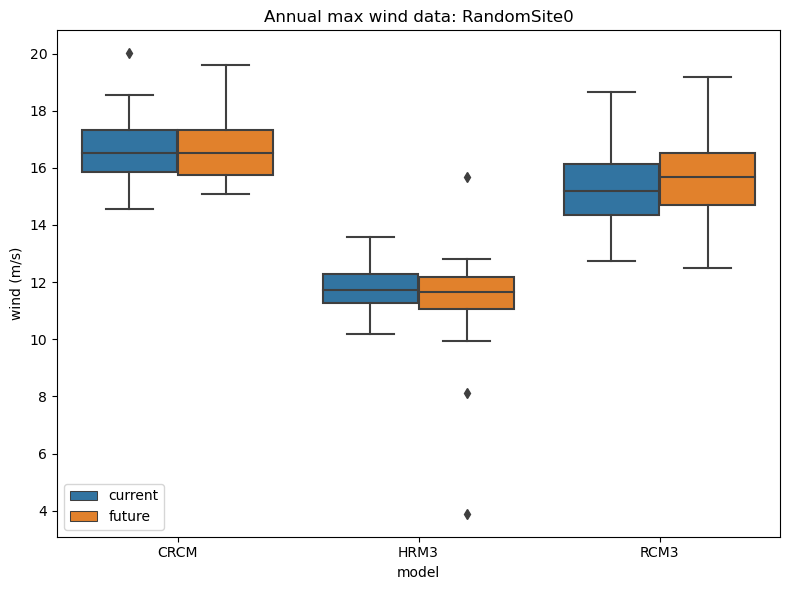

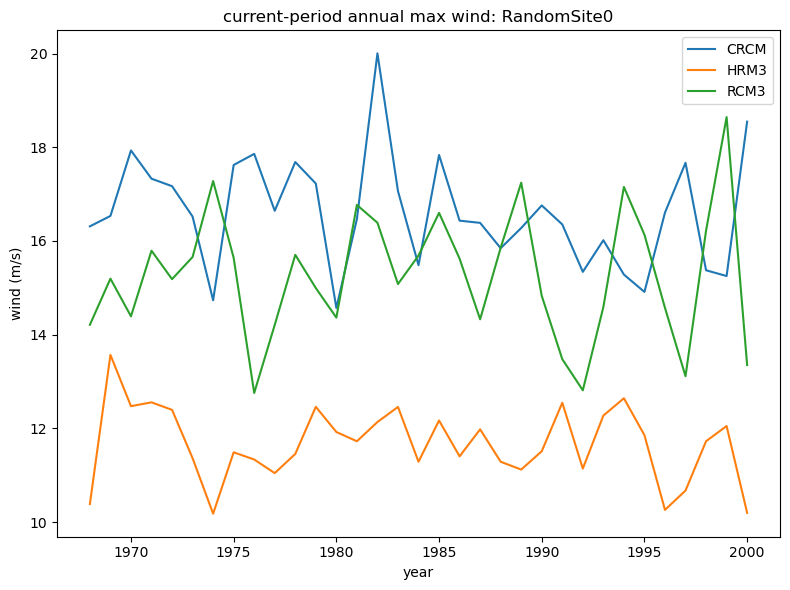

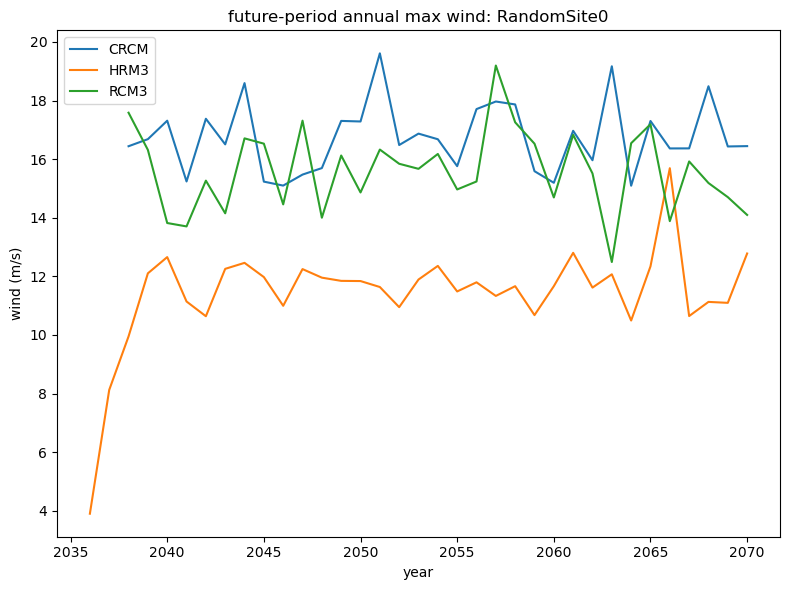

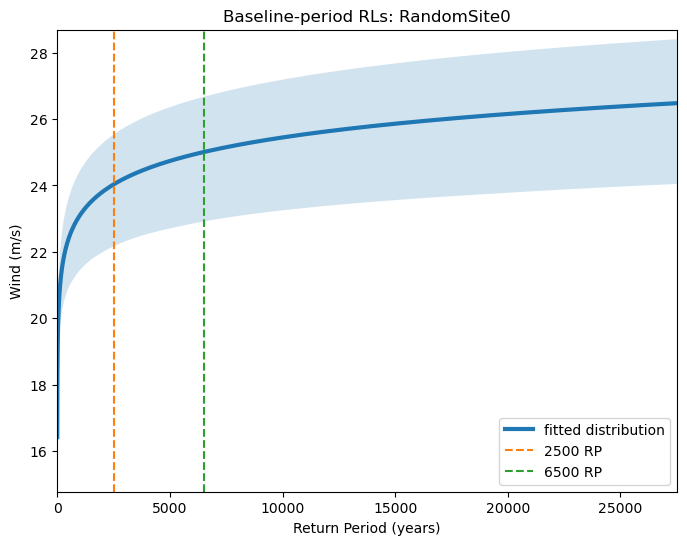

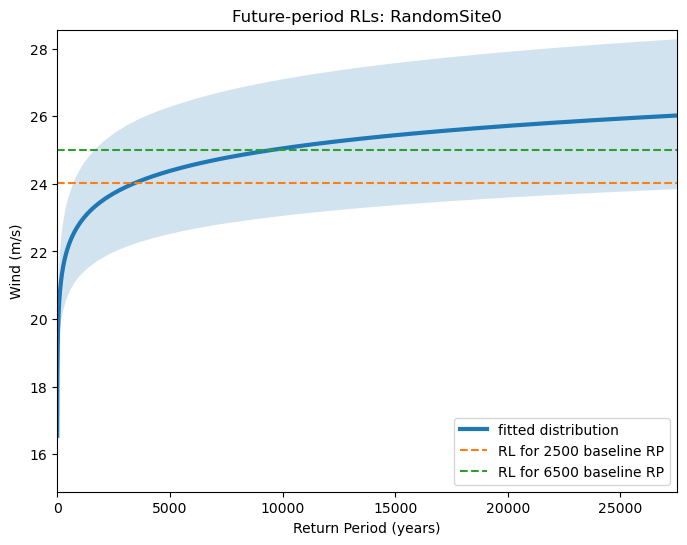

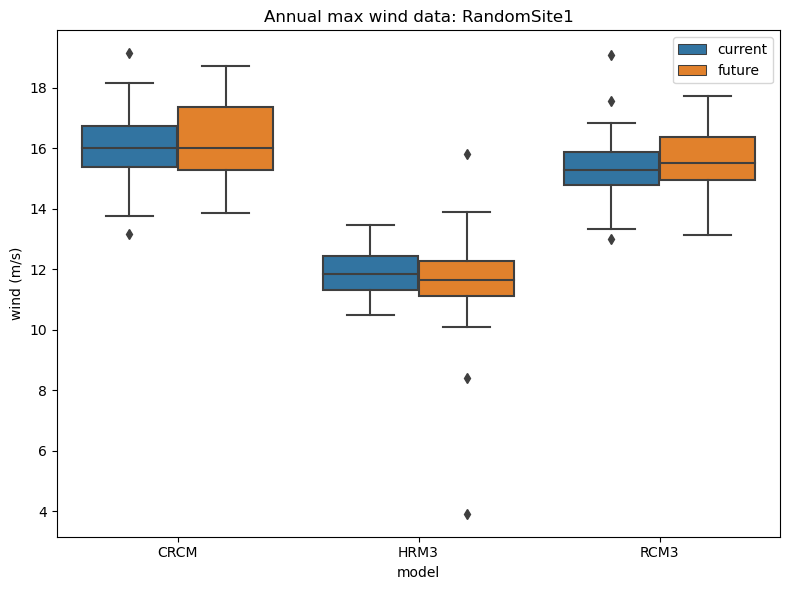

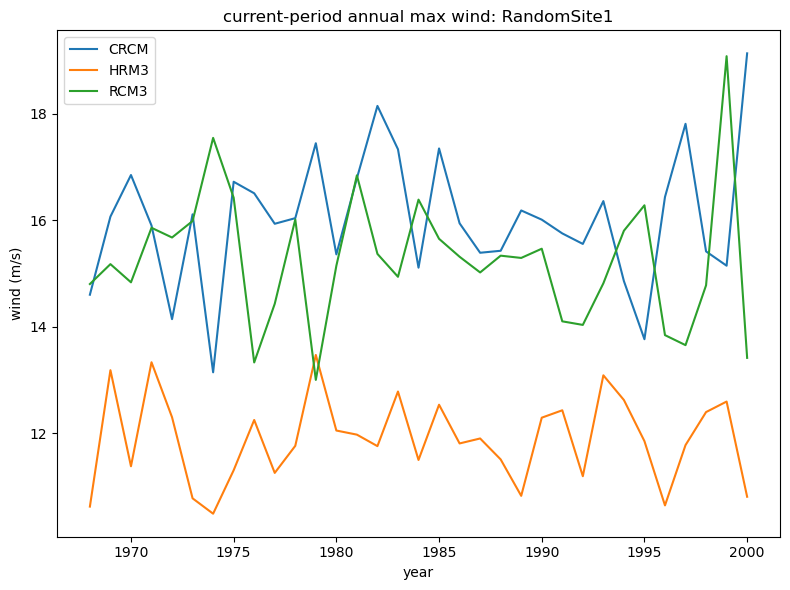

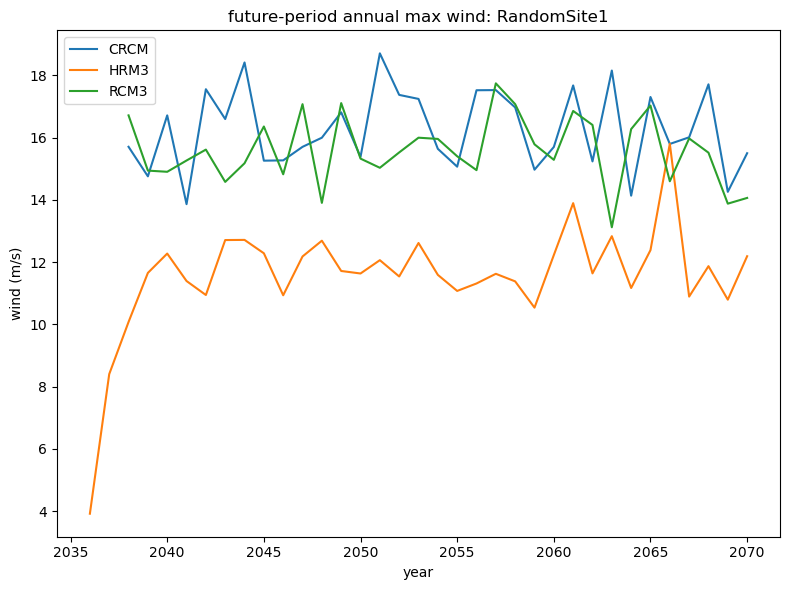

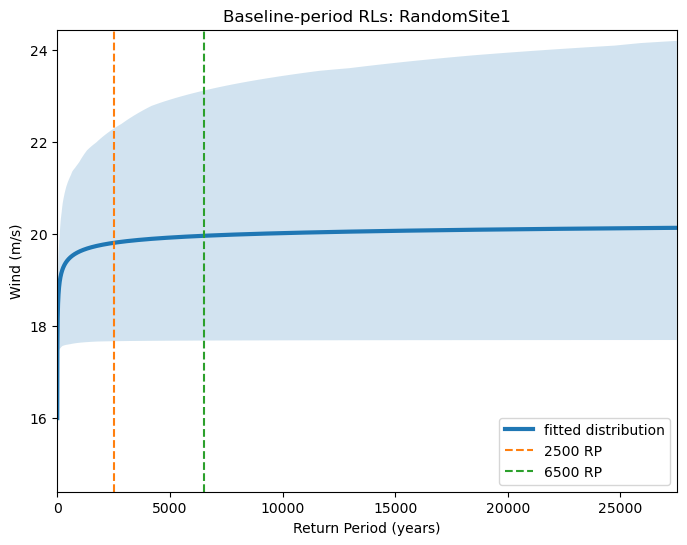

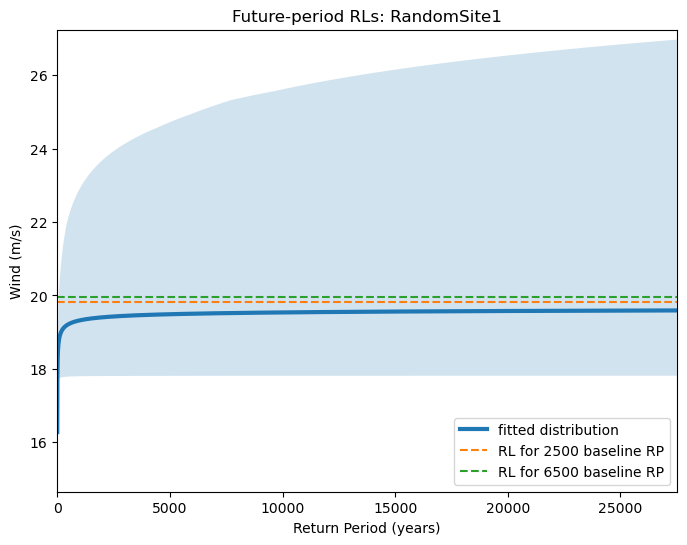

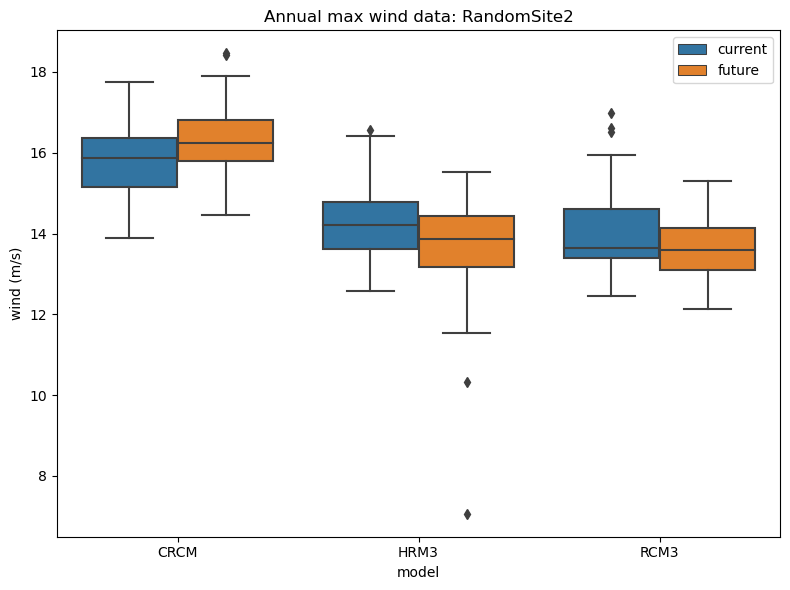

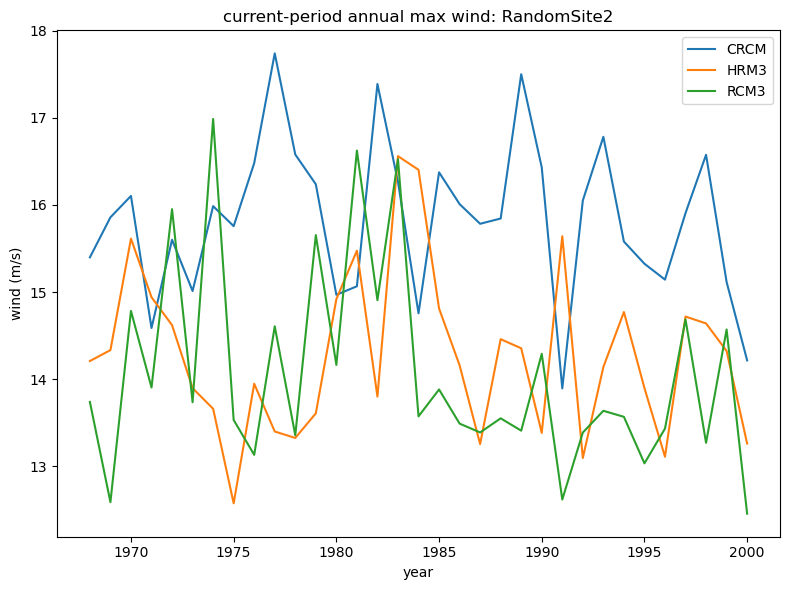

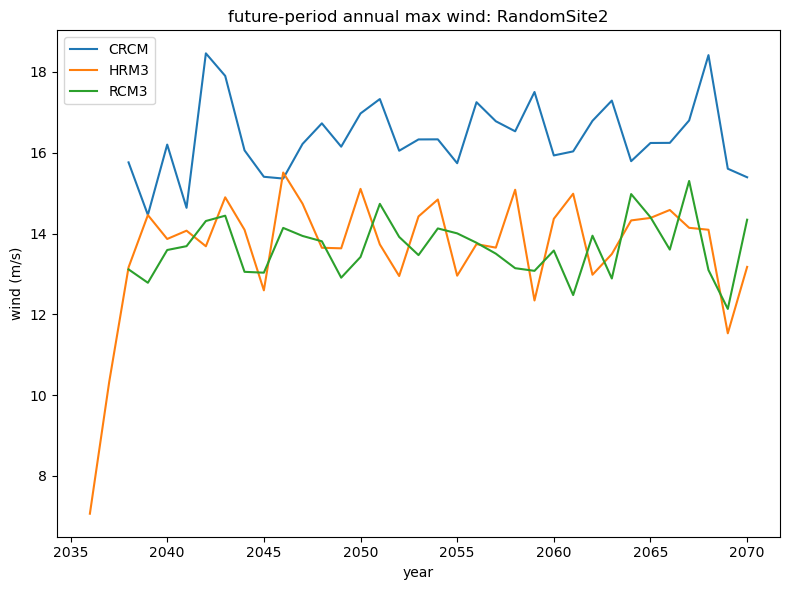

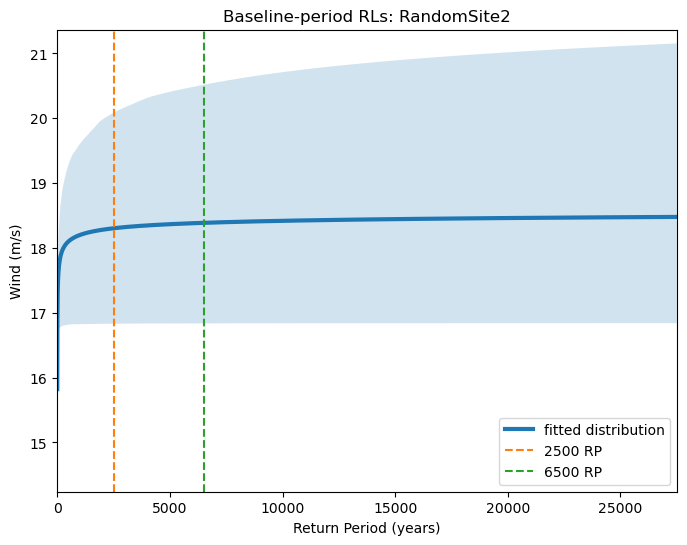

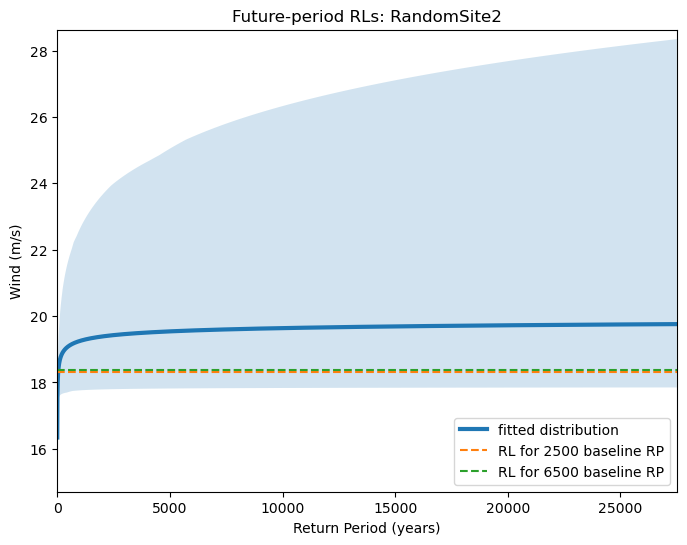

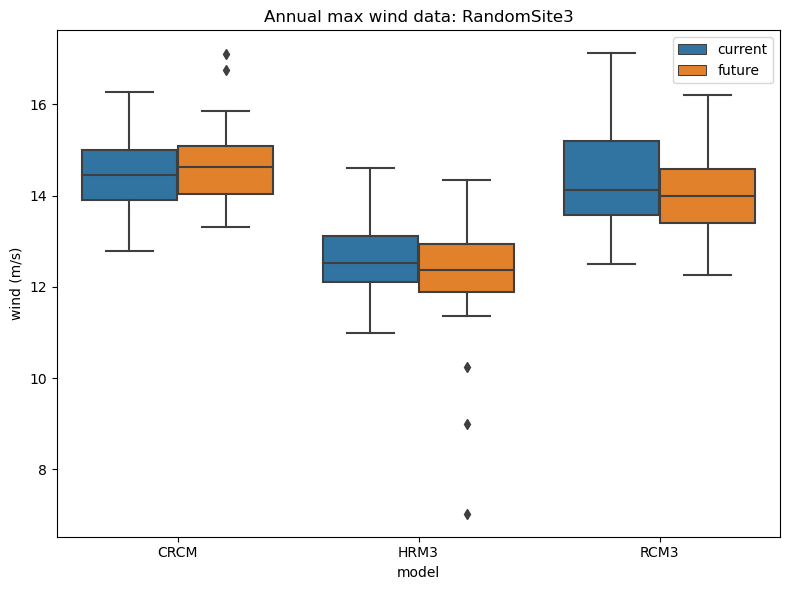

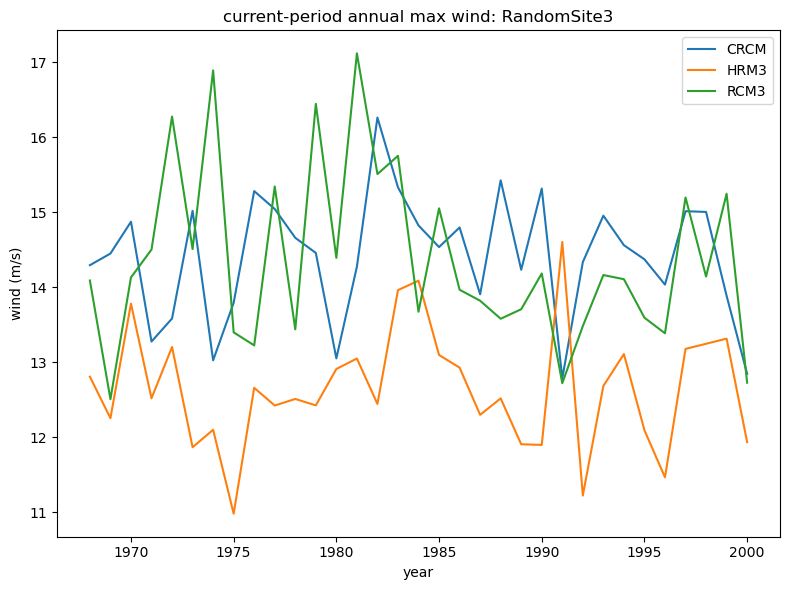

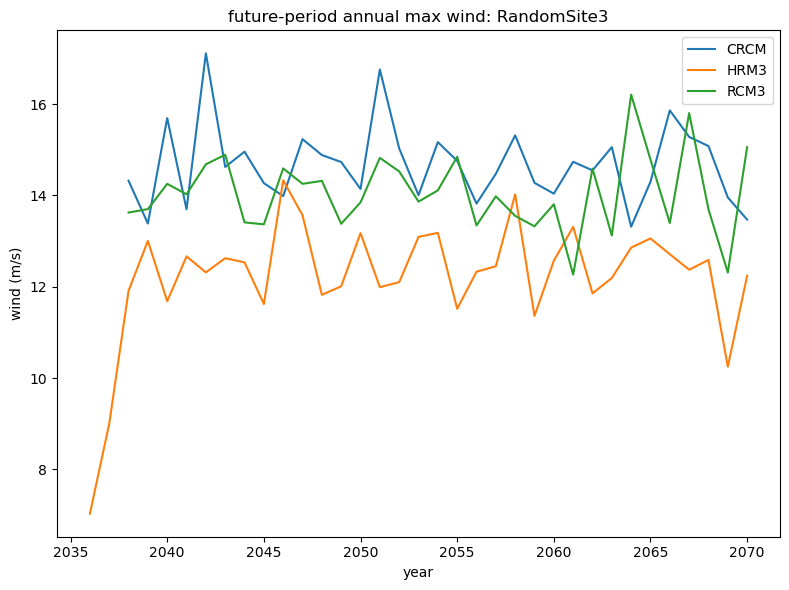

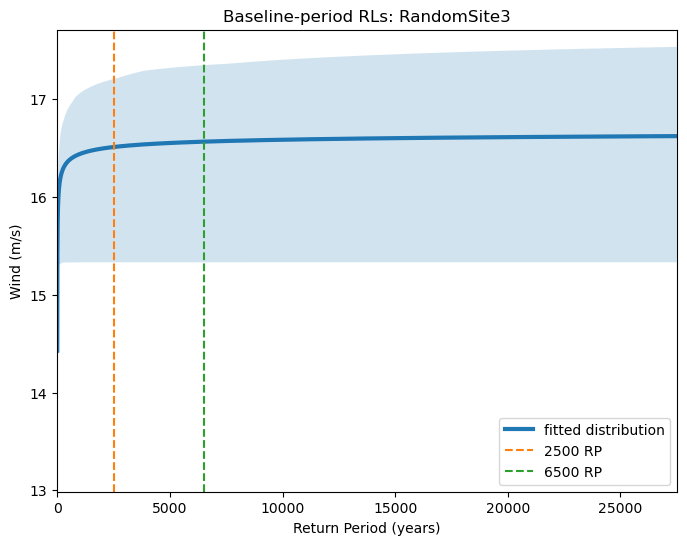

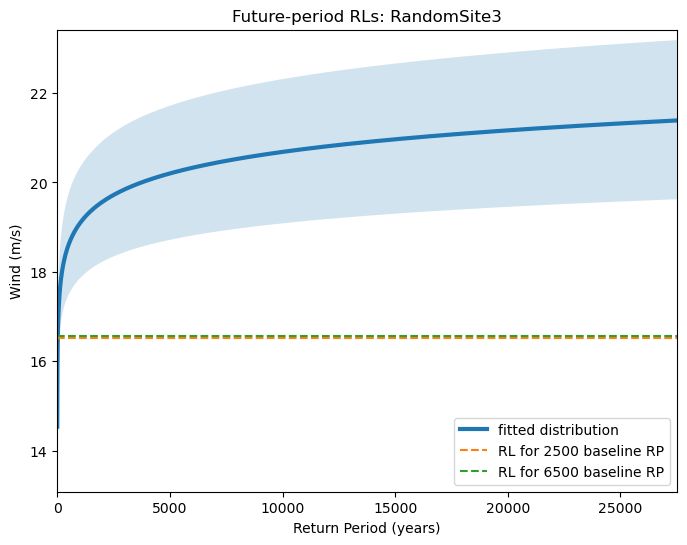

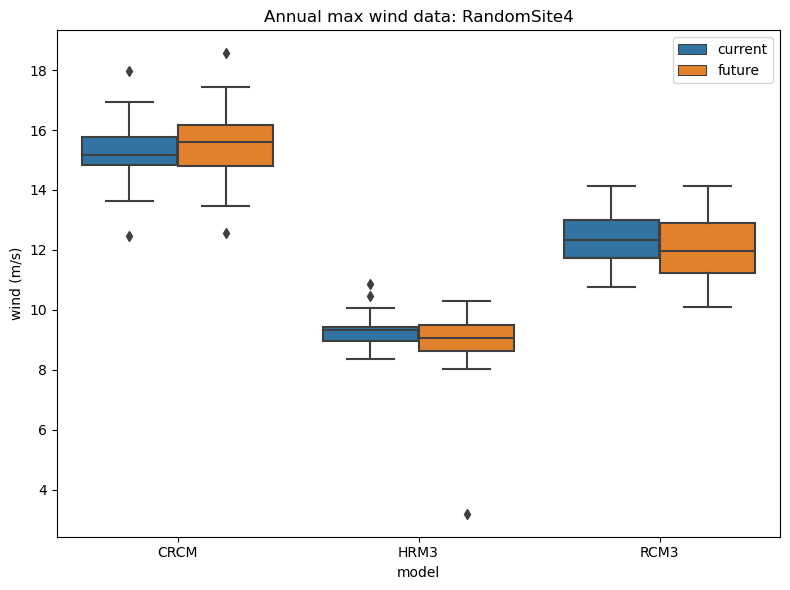

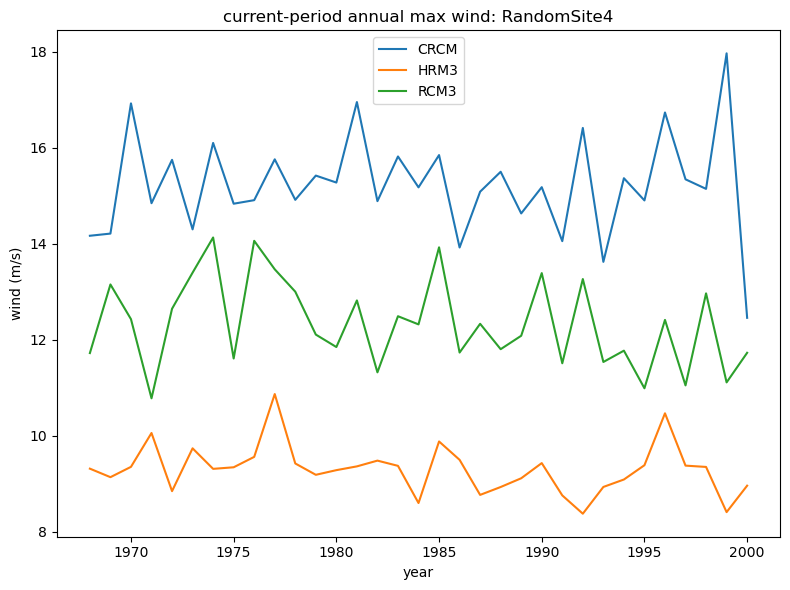

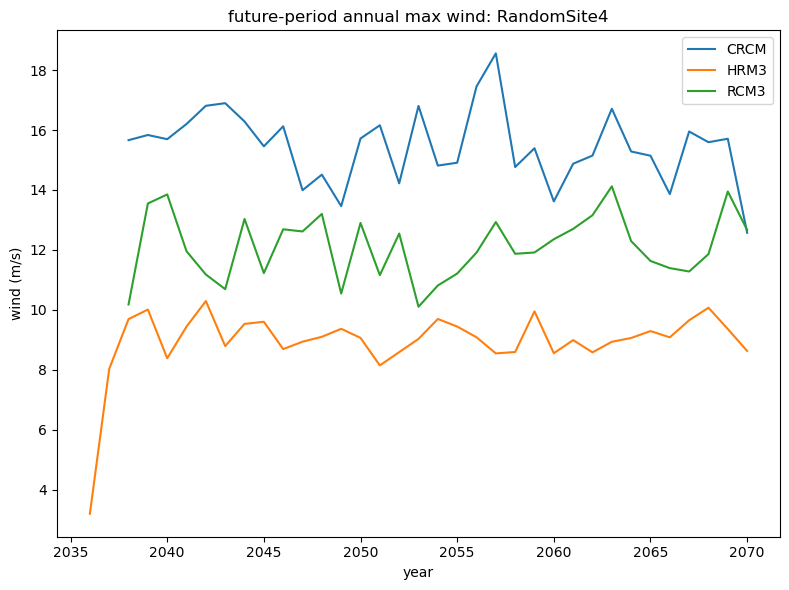

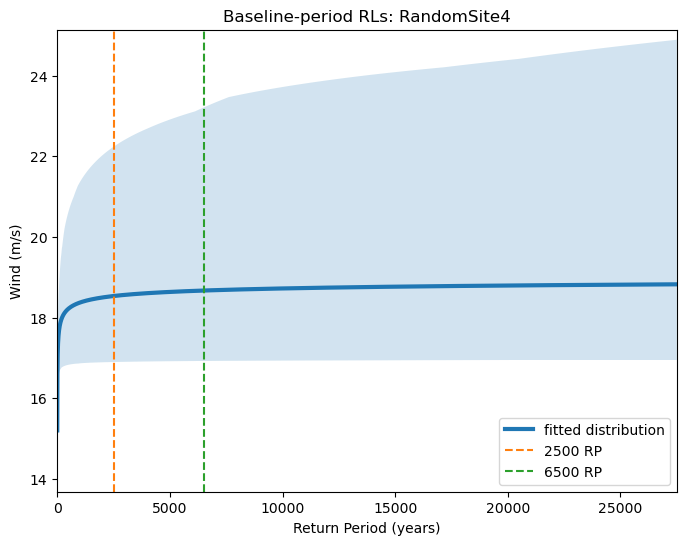

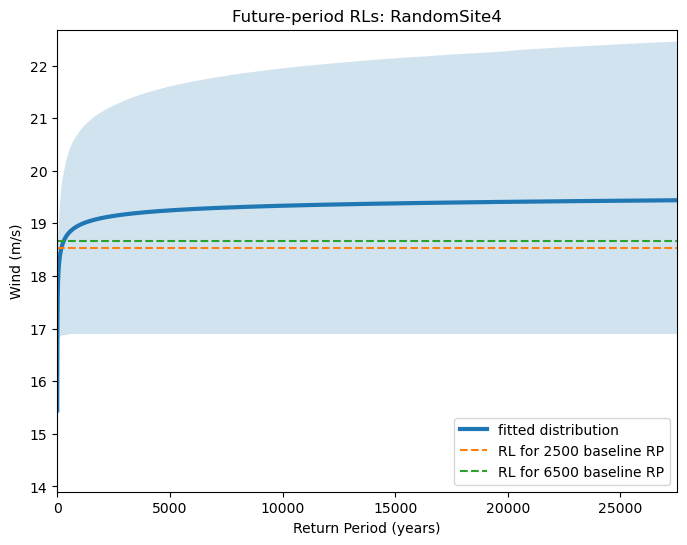

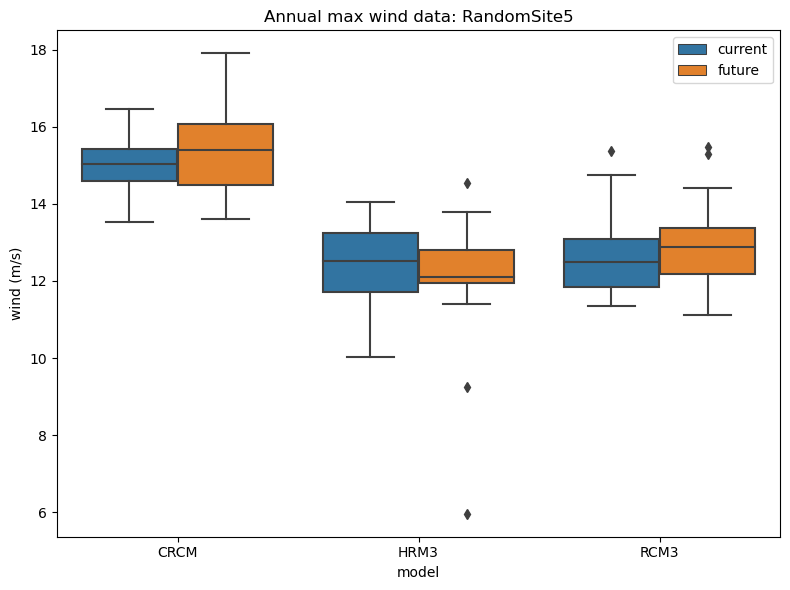

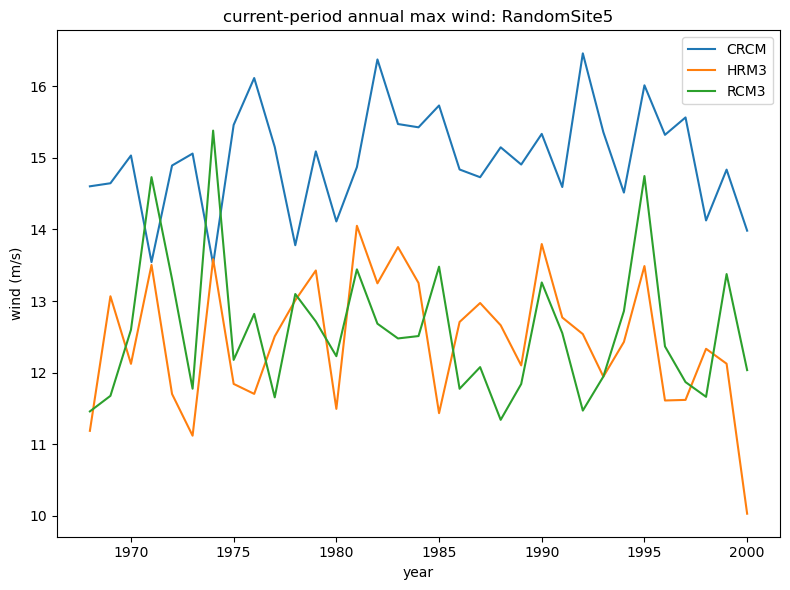

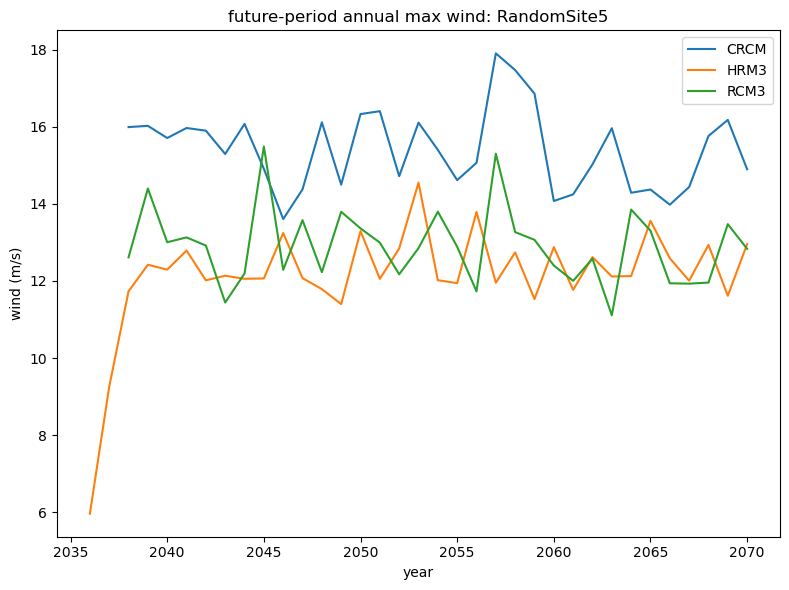

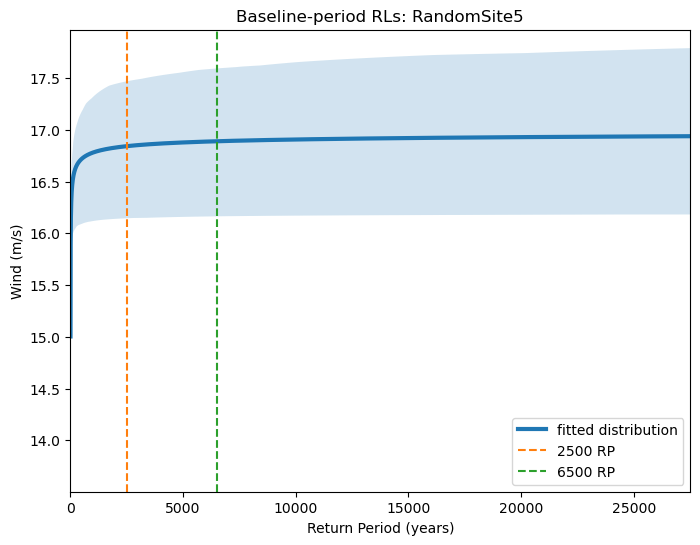

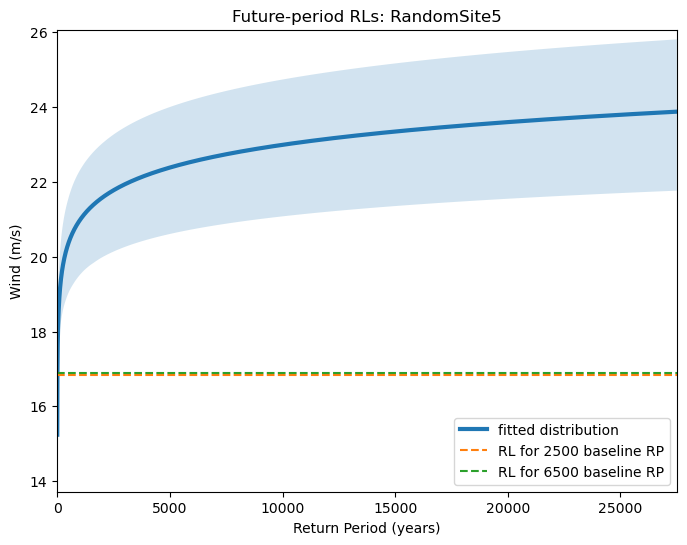

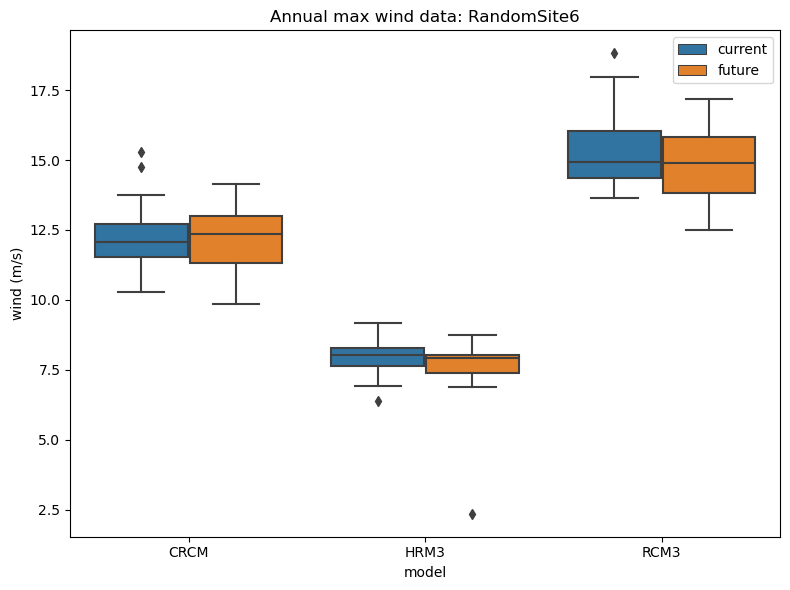

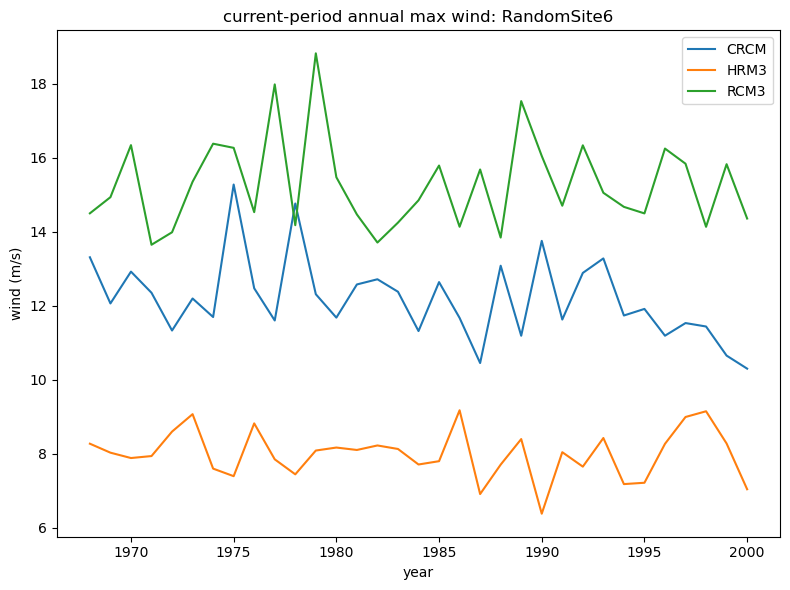

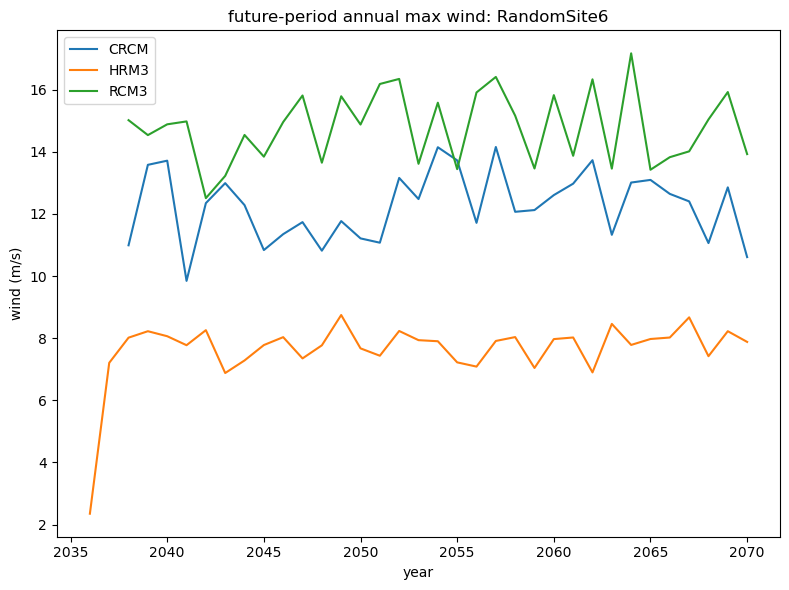

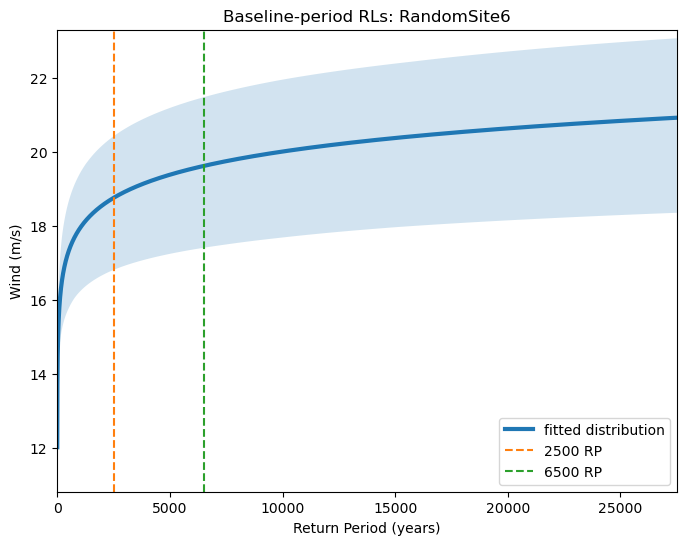

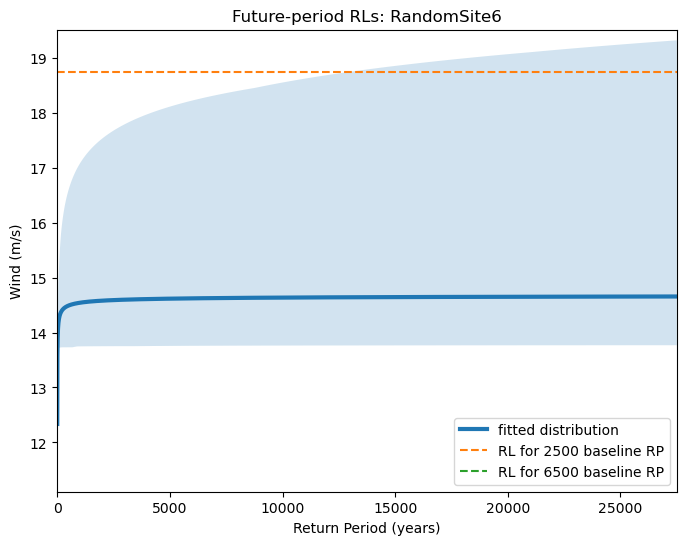

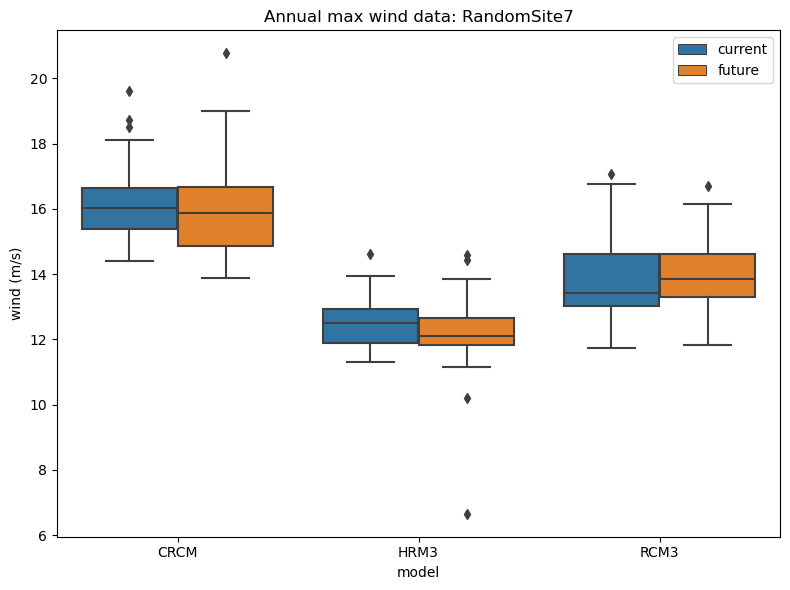

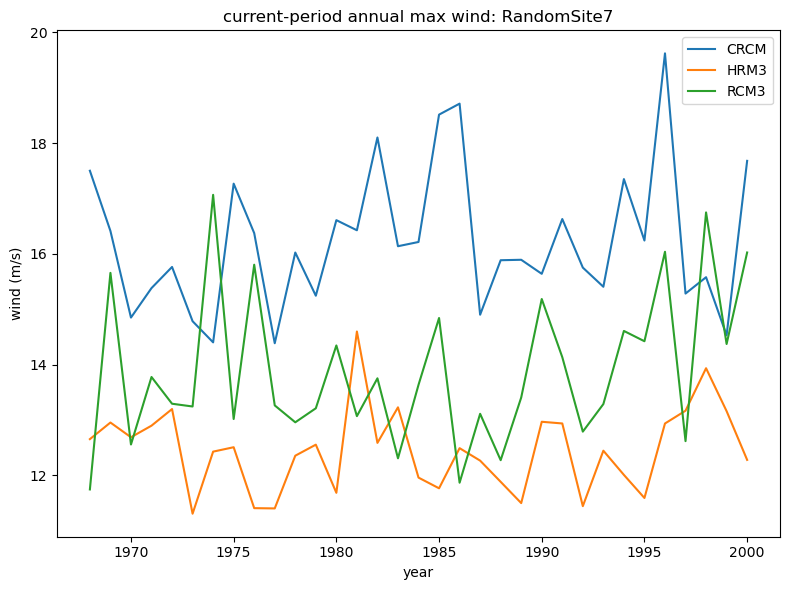

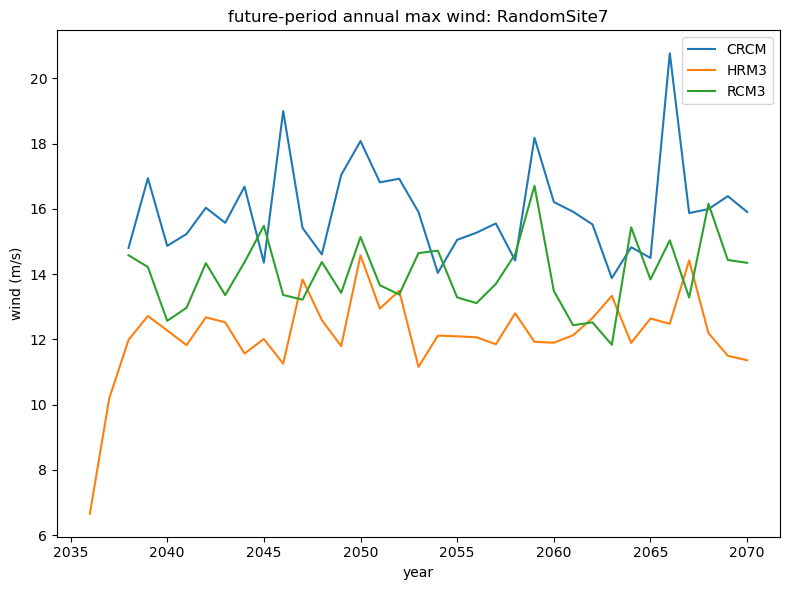

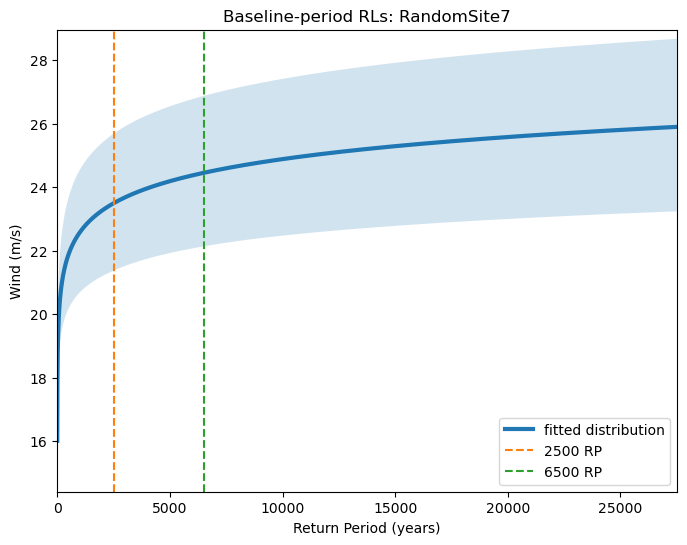

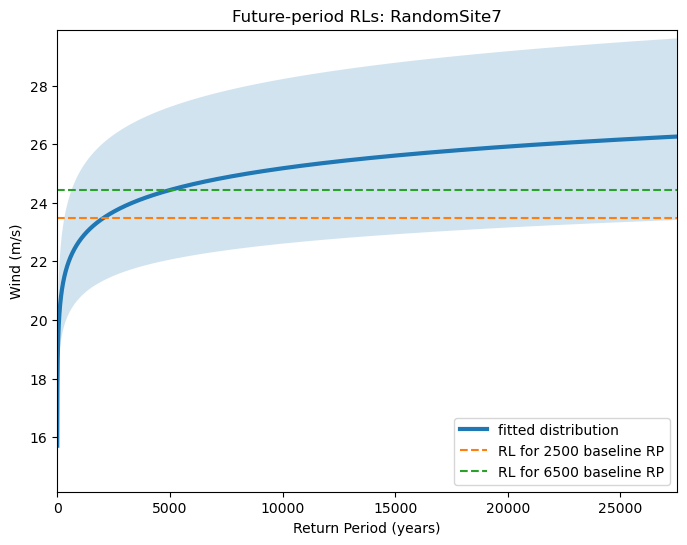

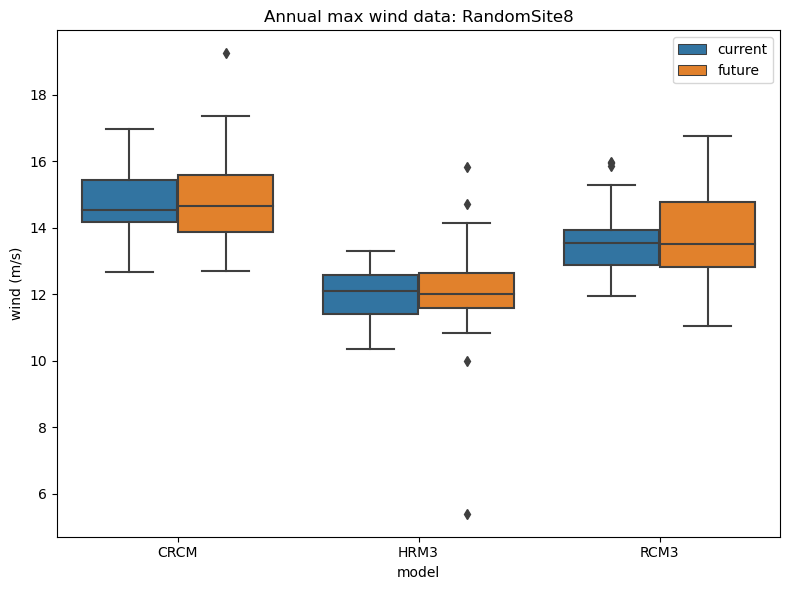

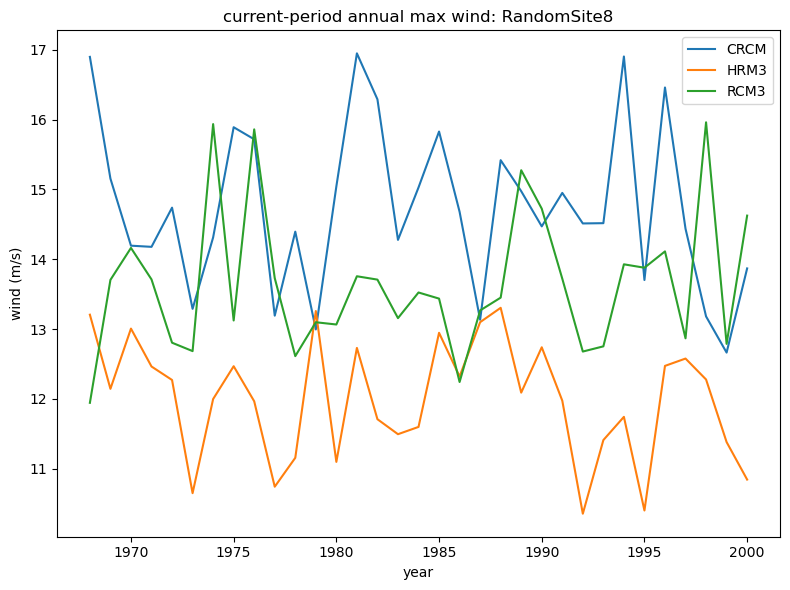

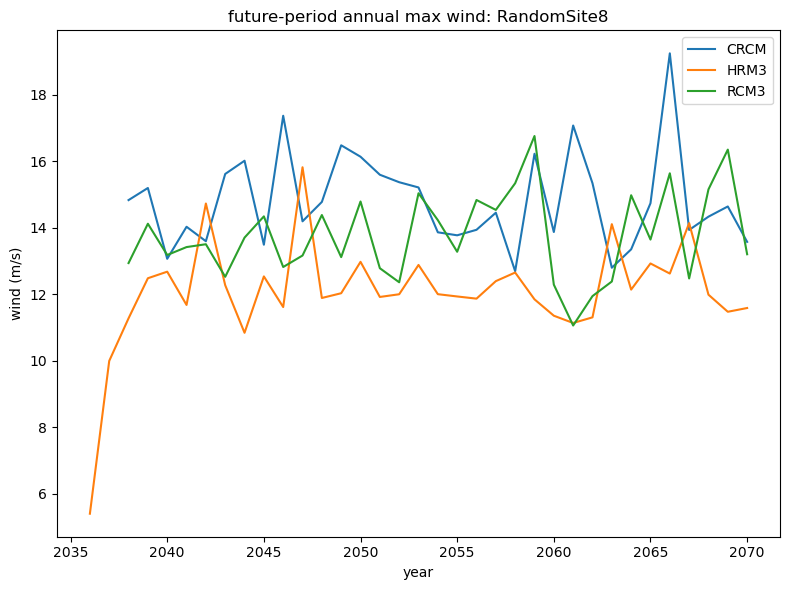

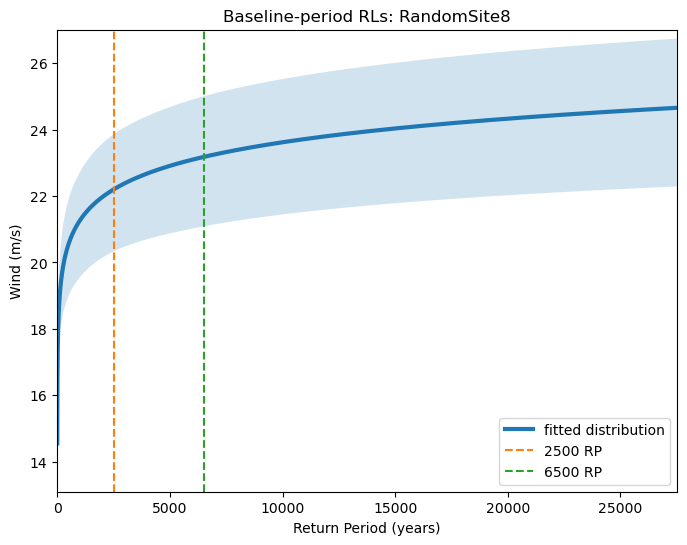

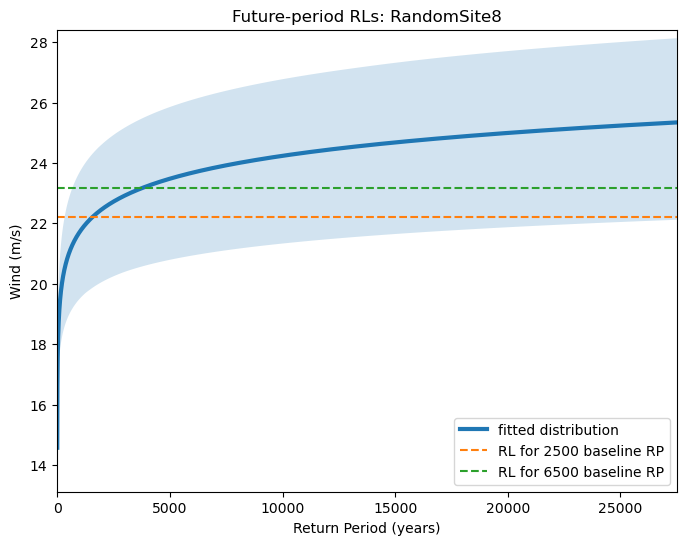

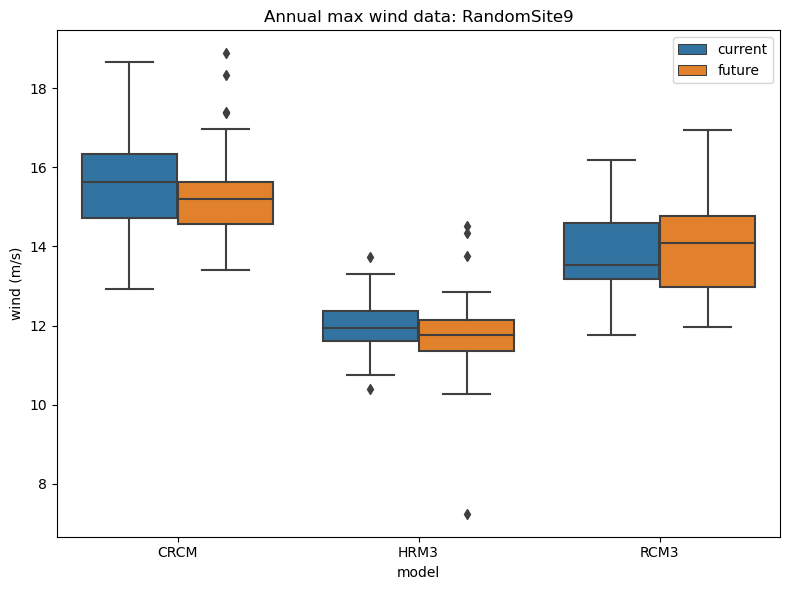

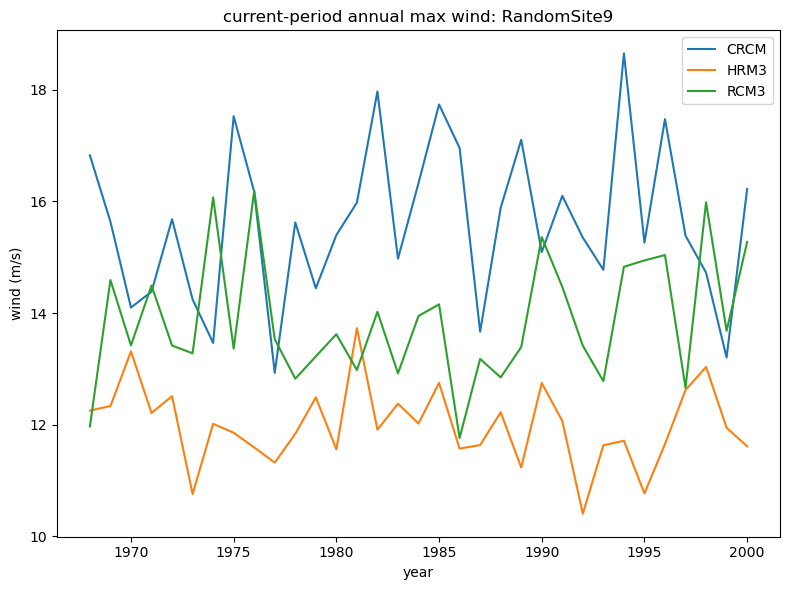

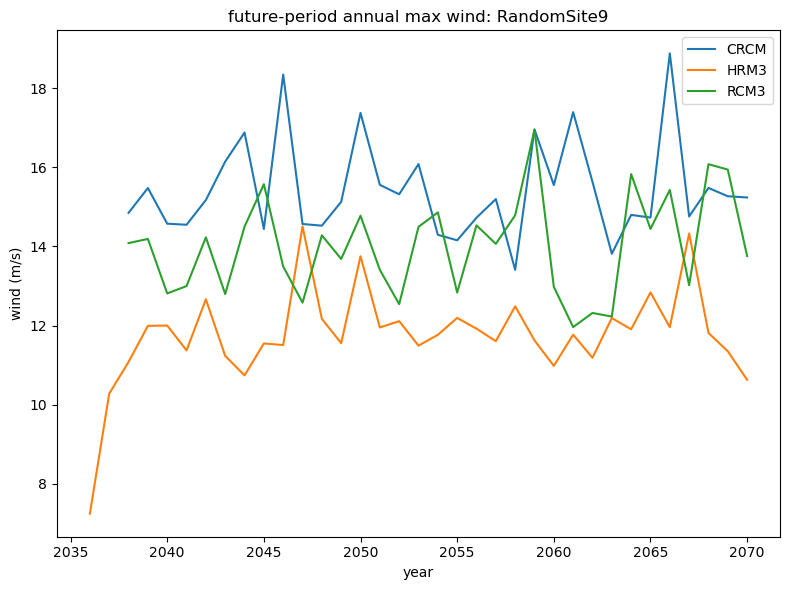

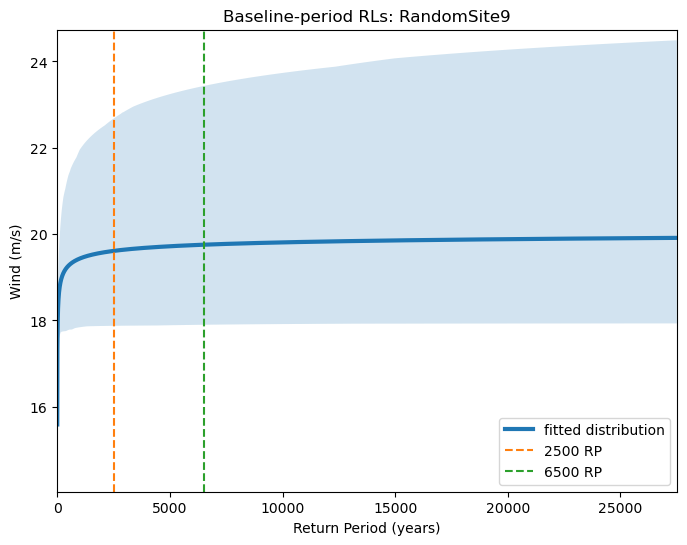

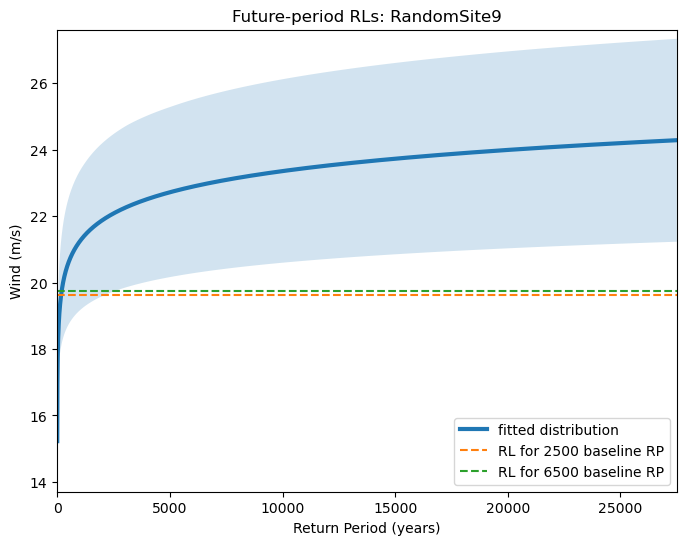

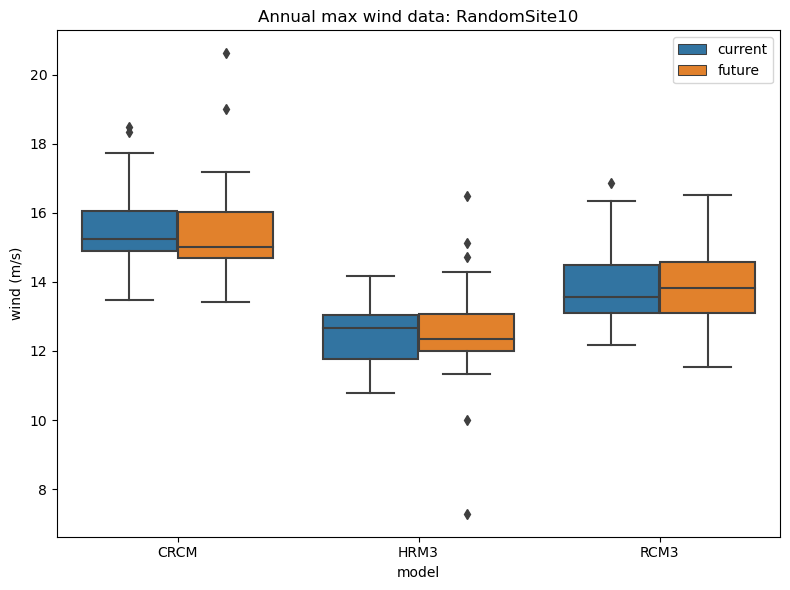

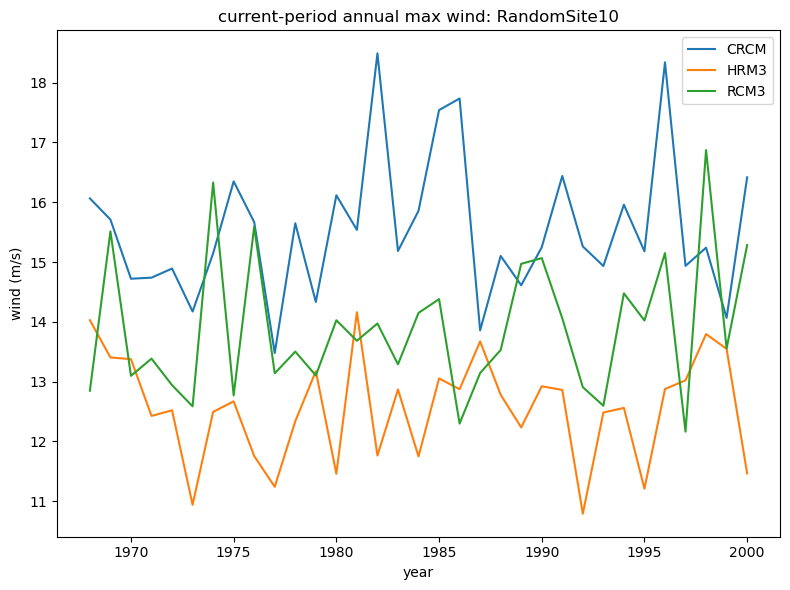

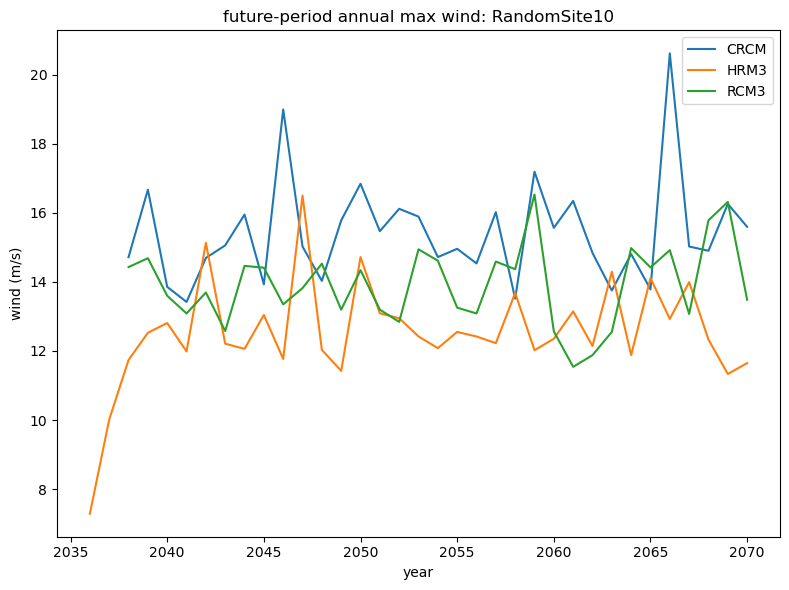

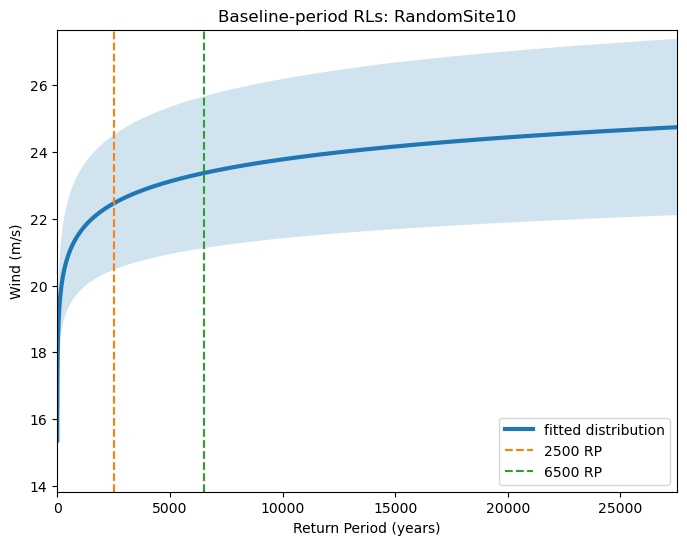

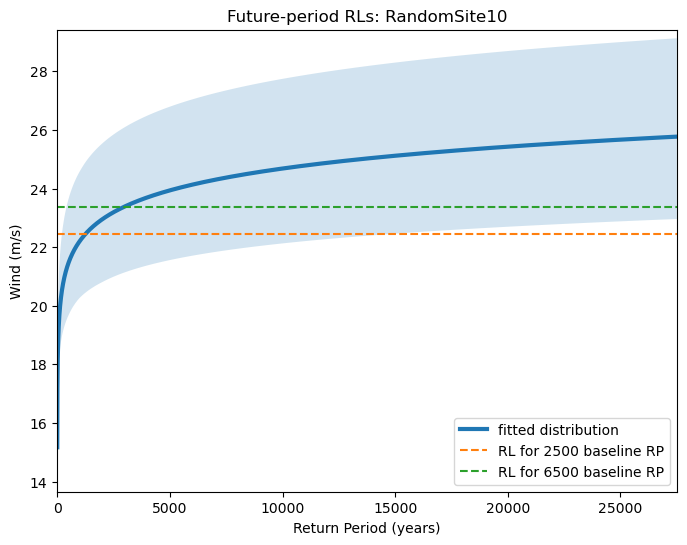

In [4]:
# =============================================================================
# #Relevant Imports
# =============================================================================
import pandas as pd
import numpy as np
import chrpa.main.processing as main
import os
import glob

# =============================================================================
# Loading lists from Part 1 above
# =============================================================================
climate_models = ['HRM3_gfdl', 'CRCM_ccsm', 'CRCM_cgcm3',
                  'HRM3_hadcm3', 'RCM3_cgcm3', 'RCM3_gfdl']

pkl_dir = os.path.join('outputs_multi','pkl_data')
genplots_dir = os.path.join('outputs_multi', 'plots', 'wind') #general plots directory

sites = pd.read_pickle('sites.pkl')
wind_stats_allsites = pd.DataFrame()
RPsRLsDF = pd.DataFrame()

for i in range(len(sites)):
    site_loc = (sites.iloc[i].lat, sites.iloc[i].lon)
    site_name = 'RandomSite'+str(i)
    print(site_name+' lat/lon:', site_loc)

    timeuas_current_ser = pd.read_pickle(os.path.join(pkl_dir, site_name+'_timelistUAScurrent_mods.pkl'))
    uas_current_ser = pd.read_pickle(os.path.join(pkl_dir, site_name+'_UASlistcurrent_mods.pkl'))
    timeuas_future_ser = pd.read_pickle(os.path.join(pkl_dir, site_name+'_timelistUASfuture_mods.pkl'))
    uas_future_ser = pd.read_pickle(os.path.join(pkl_dir, site_name+'_UASlistfuture_mods.pkl'))
    
    timevas_current_ser = pd.read_pickle(os.path.join(pkl_dir, site_name+'_timelistVAScurrent_mods.pkl'))
    vas_current_ser = pd.read_pickle(os.path.join(pkl_dir, site_name+'_VASlistcurrent_mods.pkl'))
    timevas_future_ser = pd.read_pickle(os.path.join(pkl_dir, site_name+'_timelistVASfuture_mods.pkl'))
    vas_future_ser = pd.read_pickle(os.path.join(pkl_dir, site_name+'_VASlistfuture_mods.pkl'))

    wind_stats_main = pd.DataFrame()
    windDF_AnnMax = pd.DataFrame()
    for mymodel in climate_models:
        # =============================================================================
        # Creating Time-Weather Data Frames
        # =============================================================================
        timelistuas_current = timeuas_current_ser[mymodel]
        uaslist_current = uas_current_ser[mymodel]
        timelistuas_future = timeuas_future_ser[mymodel]
        uaslist_future = uas_future_ser[mymodel]
        
        timelistvas_current = timevas_current_ser[mymodel]
        vaslist_current = vas_current_ser[mymodel]
        timelistvas_future = timevas_future_ser[mymodel]
        vaslist_future = vas_future_ser[mymodel]


        # =============================================================================
        #     Wind
        # =============================================================================
        start_time1 = "1968-01-01 00:00:00"
        start_time2 = "2038-01-01 00:00:00" #used for converting all "future" time-deltas (as provided by the NARCCAP files), except for HRM3-based climate models which use start_time1

        wvar1 = 'uas'
        wvar2 = 'vas'
        wndvar = 'wind'
        tint = 3 #hours
        tvar = 'time'

        timeuasDF_current = main.timedelta_to_continuous_w_weather(timelistuas_current,
                                                                  uaslist_current,
                                                                  wvar=wvar1,
                                                                  start_time=start_time1,
                                                                  start_time_format="%Y-%m-%d %H:%M:%S",
                                                                  td_unit='days')
        
        timevasDF_current = main.timedelta_to_continuous_w_weather(timelistvas_current,
                                                          vaslist_current,
                                                          wvar=wvar2,
                                                          start_time=start_time1,
                                                          start_time_format="%Y-%m-%d %H:%M:%S",
                                                          td_unit='days')
        
        if 'HRM3' in mymodel:
            start_time_fut = start_time1
        else:
            start_time_fut = start_time2
            
        timeuasDF_future = main.timedelta_to_continuous_w_weather(timelistuas_future,
                                                                 uaslist_future,
                                                                 wvar=wvar1,
                                                                 start_time=start_time_fut,
                                                                 start_time_format="%Y-%m-%d %H:%M:%S",
                                                                 td_unit='days')
        
        timevasDF_future = main.timedelta_to_continuous_w_weather(timelistvas_future,
                                                         vaslist_future,
                                                         wvar=wvar2,
                                                         start_time=start_time_fut,
                                                         start_time_format="%Y-%m-%d %H:%M:%S",
                                                         td_unit='days')

        # =============================================================================
        #     Converting directional-wind to wind-speed, and creating data frames with daily data
        # =============================================================================

        # Note that time-stamps with NaNs are cleaned out of the data set here.
        windDF_current = main.convert_uasvas_to_wind(timeuasDF_current, timevasDF_current, wvar1, wvar2, tvar, wndvar)
        windDF_future = main.convert_uasvas_to_wind(timeuasDF_future, timevasDF_future, wvar1, wvar2, tvar, wndvar)

        # Aggregating daily wind by taking a mean
        aggfun = 'mean'
        windDF_current_daily = main.convert_to_daily(windDF_current, tvar=tvar, aggfun=aggfun)
        windDF_future_daily = main.convert_to_daily(windDF_future, tvar=tvar, aggfun=aggfun)

        #=========================Removing Spikes in RCM3===================
        windDF_current_daily = windDF_current_daily[windDF_current_daily.wind<500]
        windDF_future_daily = windDF_future_daily[windDF_future_daily.wind<500]
        #=======================End Spike Removal====================================


        wind_stats_current, wind_stats_future = main.summary_stat_fun(windDF_current_daily,
                                                                      windDF_future_daily,
                                                                      mymodel,
                                                                      site_name)
        wind_stats_main = pd.concat([wind_stats_main,
                                     wind_stats_current,
                                     wind_stats_future],
                                    ignore_index=True)


        # =============================================================================
        #     Extracting Annual Extremes
        # =============================================================================
        max_dict_rename_wind = {'wind':'MaxWind'}
        windDF_current_AnnMax = main.get_annual_max(windDF_current_daily,
                                                      max_dict_rename_wind,
                                                      mymodel,
                                                      'current')
        windDF_future_AnnMax = main.get_annual_max(windDF_future_daily,
                                                     max_dict_rename_wind,
                                                     mymodel,
                                                     'future')

        windDF_AnnMax = pd.concat([windDF_AnnMax,
                                     windDF_current_AnnMax,
                                     windDF_future_AnnMax],
                                    ignore_index=True)

    #-------Models-loop Ends
    wind_stats_main = wind_stats_main.sort_values(by=['time_period', 'model'], ignore_index=True)
    print(wind_stats_main, '\n')
    wind_stats_allsites = pd.concat([wind_stats_allsites,
                                       wind_stats_main],
                                      ignore_index=True)
    windDF_AnnMax.model = windDF_AnnMax.model.apply(lambda x: x[:4])
    windDF_AnnMax_agg = windDF_AnnMax.groupby(['model', 'period', 'year']).mean(numeric_only=True) #averaging out values from 2 different BCs for each model
    windDF_AnnMax_agg.reset_index(inplace=True)


    main.combined_boxplots(windDF_AnnMax_agg, 'wind', site_name, os.path.join(genplots_dir,'data_plots'))
    main.line_plot(site_name, 'current', windDF_AnnMax_agg[windDF_AnnMax_agg.period=='current'], 'wind', os.path.join(genplots_dir,'data_plots'), 'model')
    main.line_plot(site_name, 'future', windDF_AnnMax_agg[windDF_AnnMax_agg.period=='future'], 'wind', os.path.join(genplots_dir,'data_plots'), 'model')

    # =============================================================================
    #     Fitting Extreme Data
    # =============================================================================
    mymodel = 'CRCM'
    windDF_current = windDF_AnnMax_agg[(windDF_AnnMax_agg.period=='current') & (windDF_AnnMax_agg.model==mymodel)].reset_index(drop=True)
    windDF_future = windDF_AnnMax_agg[(windDF_AnnMax_agg.period=='future') & (windDF_AnnMax_agg.model==mymodel)].reset_index(drop=True)


    alpha = 0.95 
    rp_critical = np.arange(2,27501)
    currentWindRLs = main.myextremes(windDF_current,
                                     rp_critical,
                                     'MaxWind',
                                     alpha)

    futureWindRLs = main.myextremes(windDF_future,
                                     rp_critical,
                                     'MaxWind',
                                     alpha)

    plot_dict_current = {'title': 'Baseline-period RLs: '+site_name,
                         'xlabel':'Return Period (years)',
                         'ylabel': 'Wind (m/s)',
                         'legendloc': 'lower right',
                         'savedir': os.path.join(genplots_dir,'model_plots')

                }
    plot_dict_future = {'title': 'Future-period RLs: '+site_name,
                        'xlabel':'Return Period (years)',
                        'ylabel': 'Wind (m/s)',
                        'legendloc': 'lower right',
                        'savedir': os.path.join(genplots_dir,'model_plots')
                       }

    KeyRPs = [2500.0, 6500.0]
    KeyBaselineRPsRLs = {i:currentWindRLs.loc[i, 'return value'] for i in KeyRPs}#return values corresponding to key RPs in baseline distribution
    
    period = 'baseline'
    main.rp_plots(site_name, period, currentWindRLs, KeyBaselineRPsRLs, plot_dict_current)
    
    period = 'future'
    main.rp_plots(site_name, period, futureWindRLs, KeyBaselineRPsRLs, plot_dict_future)
    
    futureRP_fromBaselineRLs = {i:main.find_rl_location(futureWindRLs, KeyBaselineRPsRLs[i]) for i in KeyRPs}
    
    KeyBaselineRPsRLs_DF = pd.DataFrame({i:[j] for i,j in KeyBaselineRPsRLs.items()})
    KeyBaselineRPsRLs_DF['period'] = 'baseline'
    KeyBaselineRPsRLs_DF['site'] = site_name
    futureRP_fromBaselineRLs_DF = pd.DataFrame({i:[j] for i,j in futureRP_fromBaselineRLs.items()})
    futureRP_fromBaselineRLs_DF['period'] = 'future'
    futureRP_fromBaselineRLs_DF['site'] = site_name
   
    RPsRLsDF = pd.concat([RPsRLsDF, KeyBaselineRPsRLs_DF, futureRP_fromBaselineRLs_DF], ignore_index=True)
    
#-------Sites-loop ends
wind_stats_allsites.to_csv(os.path.join('outputs_multi','summary_stats','daily_wind_summary_stats.csv'))
RPsRLsDF.to_csv(os.path.join('outputs_multi', 'RPsRLs_wind.csv'))